In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50

In [ ]:
!unzip /content/drive/MyDrive/TRUE_TEST.zip -d /content/final_test

In [ ]:
!unzip /content/drive/MyDrive/RING_GAL_DATA_SORTED_5.zip -d /content/final_sort

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/RingNetSimInception')

In [ ]:
model.pop()
model.pop()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 module_wrapper (ModuleWrapp  (None, 1536)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              786944    
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 1)                513       
 pper)                                                           
                                                                 
Total params: 55,124,193
Trainable params: 55,063,649


In [ ]:
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.layers[0].trainable = False

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 module_wrapper (ModuleWrapp  (None, 1536)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              786944    
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 1)                513       
 pper)                                                           
                                                                 
Total params: 55,124,193
Trainable params: 787,457
Non

In [ ]:
pip install split-folders tqdm

In [ ]:
import splitfolders
splitfolders.ratio('/content/final_sort/RING_GAL_DATA_SORTED_4', output="output", seed=1337, ratio=(0.8, 0.1, 0.1)) 

Copying files: 9328 files [00:03, 2513.38 files/s]


In [ ]:
basetrain_dir = '/content/output/train/'
training_dir = pathlib.Path(basetrain_dir)
baseval_dir = '/content/output/val/'
validation_dir = pathlib.Path(baseval_dir)
basetest_dir = '/content/output/test/'
test_dir = pathlib.Path(basetest_dir)

In [ ]:
batch_size = 32
img_height = 256
img_width = 256

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
data_aug = ImageDataGenerator(rescale=1./255, horizontal_flip=True, width_shift_range = 0.1, height_shift_range = 0.1, 	shear_range=1.2, zoom_range=0.25, rotation_range=360)

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_ds = data_aug.flow_from_directory(
	training_dir,  
	target_size=(img_height, img_width),  
	batch_size = batch_size,
	class_mode='binary')

Found 7461 images belonging to 2 classes.


In [ ]:
validation_ds = test_gen.flow_from_directory(
	validation_dir,
	target_size=(img_height, img_width),
	batch_size = batch_size,
	class_mode='binary')

Found 932 images belonging to 2 classes.


In [ ]:
confirmation_generator = test_gen.flow_from_directory(
	test_dir,
	target_size = (img_height, img_width),
	batch_size = batch_size,
	class_mode=None,
	shuffle=False)

Found 935 images belonging to 2 classes.


In [ ]:
#differential learning rate
optimizers_and_layers = [(Adam(learning_rate = 0.00001), model.layers[0]), (Adam(learning_rate = 0.001), model.layers[1:])]

In [ ]:
pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 14.7 MB/s 


In [ ]:
import tensorflow_addons as tfa
model.compile(optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs = 1000
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(
    train_ds,
    validation_data = validation_ds,
    epochs = epochs,
    callbacks = [callback]
)

Epoch 1/1000
234/234 [==============================] - 147s 519ms/step - loss: 0.6716 - accuracy: 0.6759 - val_loss: 0.9201 - val_accuracy: 0.5290
Epoch 2/1000
234/234 [==============================] - 116s 497ms/step - loss: 0.6067 - accuracy: 0.7046 - val_loss: 0.6357 - val_accuracy: 0.6792
Epoch 3/1000
234/234 [==============================] - 116s 496ms/step - loss: 0.5974 - accuracy: 0.7089 - val_loss: 0.5839 - val_accuracy: 0.7017
Epoch 4/1000
234/234 [==============================] - 116s 498ms/step - loss: 0.5870 - accuracy: 0.7125 - val_loss: 0.5830 - val_accuracy: 0.7103
Epoch 5/1000
234/234 [==============================] - 116s 495ms/step - loss: 0.5871 - accuracy: 0.7138 - val_loss: 0.6316 - val_accuracy: 0.6631
Epoch 6/1000
234/234 [==============================] - 116s 495ms/step - loss: 0.5814 - accuracy: 0.7130 - val_loss: 0.5778 - val_accuracy: 0.7157
Epoch 7/1000
234/234 [==============================] - 115s 492ms/step - loss: 0.5730 - accuracy: 0.7246 - val_

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.0000001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.trainable = True

In [ ]:
fine_tune_epochs = 10
total_epochs =  epochs + fine_tune_epochs
history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_ds)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([342-1,342-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([342-1,342-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
def get_predictions(generator,model):
	test_steps_per_epoch = np.math.ceil(generator.samples / generator.batch_size)
	predictions = model.predict_generator(generator, steps=test_steps_per_epoch)
	predictions = [i[0] for i in predictions]
	predictions = np.array(predictions)
	return predictions


def prediction_report(predictions,generator,cutoff,chatter=False):
	predicted_classes = np.copy(predictions)
	predicted_classes[predicted_classes>cutoff] = 1.0
	predicted_classes[predicted_classes<cutoff] = 0.0 
	true_classes = generator.classes
	N_ring = len(np.where(true_classes>0.5)[0])
	N_normal = len(np.where(true_classes<0.5)[0])
	tn, fp, fn, tp = confusion_matrix(true_classes,predicted_classes).ravel()
	matrix = confusion_matrix(true_classes,predicted_classes)
	if chatter:
		print('True Normal predictions: {} | ({} percent)'.format(tn,(tn * 100)/N_normal))
		print('True Ring predictions: {} | ({} percent)'.format(tp,(tp * 100)/N_ring))
		print('False Normal predictions (actually Ring): {} | ({} percent)'.format(fn,(fn * 100)/N_ring))
		print('False Ring predictions (actually Normal): {} | ({} percent)'.format(fp,(fp * 100)/N_normal))
	return(tn, fp, fn, tp)

def MCC(theta):
	tn, fp, fn, tp = theta
	numerator = (tp*tn) - (fp*fn)
	denomenator = np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
	MCC = numerator / denomenator
	return MCC

def AUC(predictions,generator):
	thresholds = np.linspace(0.0,1,20)
	tprs = []
	fprs = []
	for i in thresholds:
		tn, fp, fn, tp = prediction_report(predictions,generator,cutoff=i,chatter=False)
		TPR = tp / (fn+tp)
		FPR = fp / (fp+tn)
		tprs.append(TPR)
		fprs.append(FPR)
	tprs = np.array(tprs)[::-1]
	fprs = np.array(fprs)[::-1]
	plt.plot(fprs,tprs)
	plt.plot([0,1],[0,1],'k')
	area = np.trapz(tprs,x=fprs)
	print("Area under the curve: {}".format(area))
	return area


In [ ]:
from sklearn.metrics import confusion_matrix
predictions = get_predictions(confirmation_generator,model)
theta = prediction_report(predictions,confirmation_generator,cutoff=0.5,chatter=True)
mcc = MCC(theta)
print('MCC: ',mcc)
area_under_curve = AUC(predictions,confirmation_generator)
#print(area_under_curve)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
model.save("ConvBlockLastLayer")

INFO:tensorflow:Assets written to: ConvBlockLastLayer/assets


INFO:tensorflow:Assets written to: ConvBlockLastLayer/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [ ]:
model.evaluate(confirmation_generator)

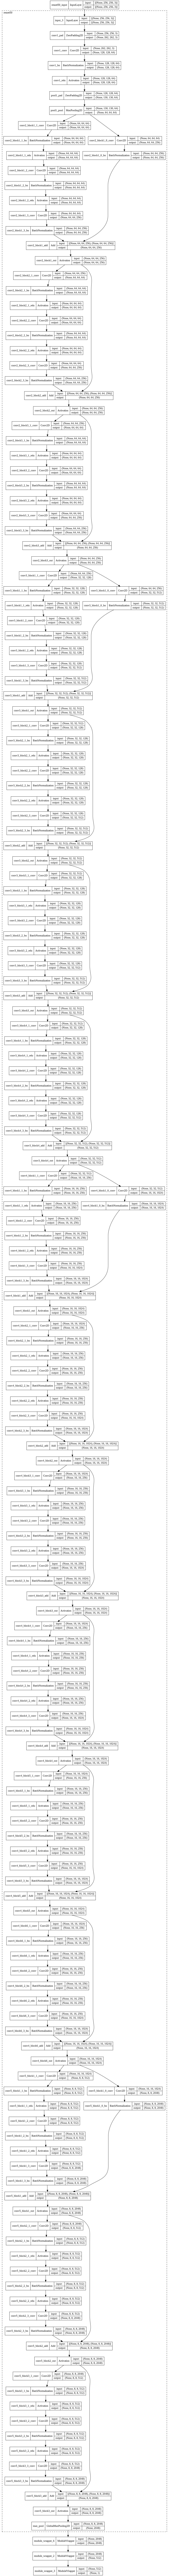

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested = True)